In [5]:
import pandas as pd
import os
import numpy as np

# Interactive Plots
This Notebooks is a part of DHH24 Hackathon and group Luxury Books. This Notebook includes Python code to plot total price with respect to illustration density.

Illustration density is calculated as image_count/leaves and aggregated by estc_id.
estc_id refers to certain book that can contain multiple volumes. ecco_id refers to certain colume of a printed book. image_count is the number of images in a volume.

Author: Juho Hotari

In [14]:
# Read the data
img_counts = pd.read_csv('image_count_by_ecco_id.csv')
sheets_data = pd.read_csv('metadata_sheets.csv')
prices = pd.read_csv('price_data_updated.csv')

In [15]:
# Merge the two DataFrames on 'ecco_id'
merged_df = pd.merge(img_counts, sheets_data, on='ecco_id')

# Calculate illustration_density for each entry
merged_df['illustration_density'] = merged_df['image_count'] / merged_df['leaves']

# Aggregate illustration_density by 'estc_id'
result = merged_df.groupby('estc_id')['illustration_density'].sum().reset_index()

# Rename columns for clarity
result.rename(columns={'illustration_density': 'total_illustration_density'}, inplace=True)

print(result)

      estc_id  total_illustration_density
0          N1                    0.015873
1       N1000                    0.023810
2      N10000                    0.008264
3      N10003                    0.037037
4      N10004                    0.036725
...       ...                         ...
84845   W9873                    0.027027
84846   W9874                    0.038462
84847   W9933                    0.083333
84848   W9959                    0.062500
84849   W9962                    0.114286

[84850 rows x 2 columns]


In [16]:
final_df = pd.merge(result, prices, on='estc_id')

In [17]:
df = pd.merge(final_df, sheets_data, on='estc_id')

In [27]:
df.format.value_counts()

8vo     478
4to     148
12mo    134
2fo      84
16mo      8
24mo      5
32mo      3
18mo      2
Name: format, dtype: int64

In [32]:
# Define colors for each format
colors = {
    '8vo': 'red',
    '12mo': 'blue',
    '4to': 'green',
    '2fo': 'orange',
    '24mo': 'purple',
    '16mo': 'brown',
    '18mo': 'cyan',
    '32mo': 'pink'
}

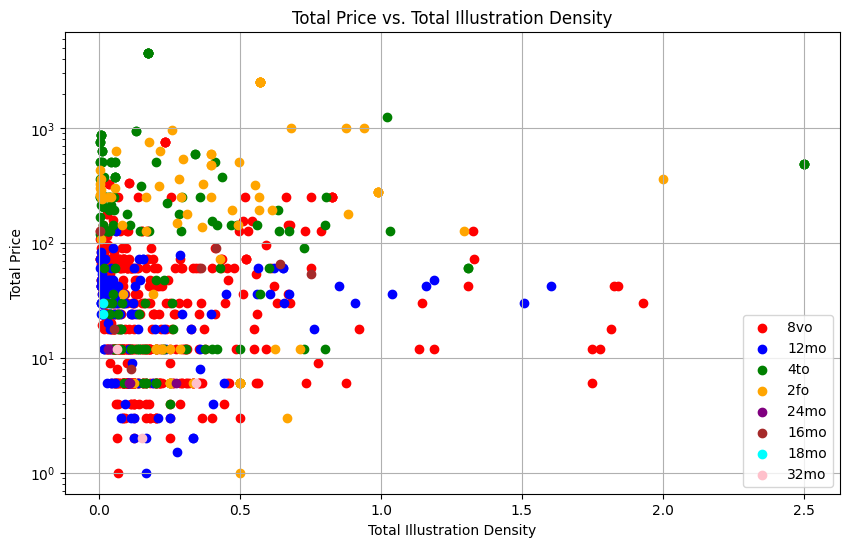

In [33]:
# Scatterplot
plt.figure(figsize=(10, 6))
for format_val, color in colors.items():
    plt.scatter(df[df['format'] == format_val]['total_illustration_density'], 
                df[df['format'] == format_val]['total_price'], 
                label=format_val, 
                color=color)

plt.xlabel('Total Illustration Density')
plt.ylabel('Total Price')
plt.title('Total Price vs. Total Illustration Density')
plt.legend()
plt.yscale('log') # Logarithmic y-axis
plt.grid(True)
plt.savefig('illustration_density_total_price_format_log.png')
plt.show()

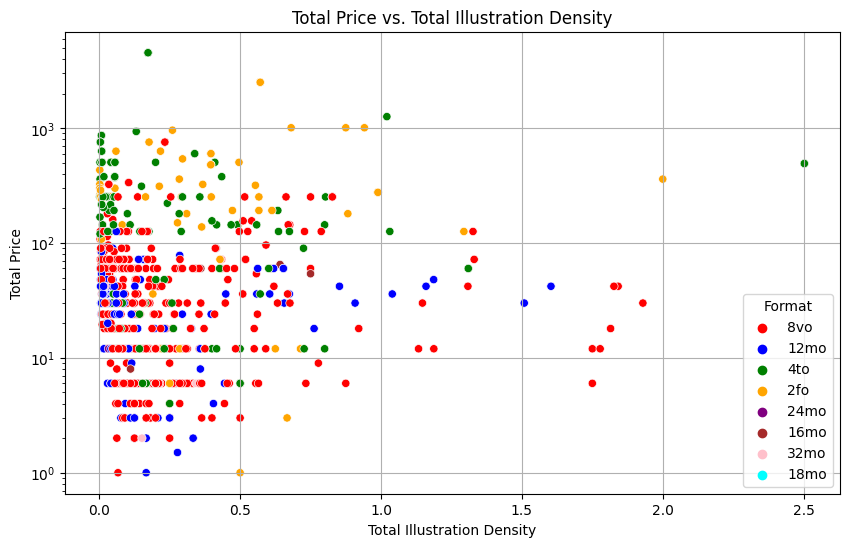

In [35]:
import seaborn as sns
# Create scatterplot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_illustration_density', y='total_price', hue='format', palette=colors)

plt.xlabel('Total Illustration Density')
plt.ylabel('Total Price')
plt.title('Total Price vs. Total Illustration Density')
plt.legend(title='Format')
plt.yscale('log') # Logarithmic y-axis
plt.grid(True)
plt.show()